In [21]:
# https://www.kaggle.com/competitions/bike-sharing-demand

# combine historical usage patterns with weather data in order to forecast bike rental demand 
# in the Capital Bikeshare program in Washington, D.C.

# You are provided hourly rental data spanning two years. For this competition, the training 
# set is comprised of the first 19 days of each month, while the test set is the 20th to the 
# end of the month. You must predict the total count of bikes rented during each hour covered 
# by the test set, using only information available prior to the rental period.

## Data Fields

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 

    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [23]:
df = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA

In [24]:
print(df.shape)

(10886, 12)


In [25]:
print(df["season"].unique())
print(df["holiday"].unique())
print(df["weather"].unique())
print(df["casual"].unique())

[1 2 3 4]
[0 1]
[1 2 3 4]
[  3   8   5   0   2   1  12  26  29  47  35  40  41  15   9   6  11   4
   7  16  20  19  10  13  14  18  17  21  33  23  22  28  48  52  42  24
  30  27  32  58  62  51  25  31  59  45  73  55  68  34  38 102  84  39
  36  43  46  60  80  83  74  37  70  81 100  99  54  88  97 144 149 124
  98  50  72  57  71  67  95  90 126 174 168 170 175 138  92  56 111  89
  69 139 166 219 240 147 148  78  53  63  79 114  94  85 128  93 121 156
 135 103  44  49  64  91 119 167 181 179 161 143  75  66 109 123 113  65
  86  82 132 129 196 142 122 106  61 107 120 195 183 206 158 137  76 115
 150 188 193 180 127 154 108  96 110 112 169 131 176 134 162 153 210 118
 141 146 159 178 177 136 215 198 248 225 194 237 242 235 224 236 222  77
  87 101 145 182 171 160 133 105 104 187 221 201 205 234 185 164 200 130
 155 116 125 204 186 214 245 218 217 152 191 256 251 262 189 212 272 223
 208 165 229 151 117 199 140 226 286 352 357 367 291 233 190 283 295 232
 173 184 172 320 355 326 

In [26]:
print(f"Number of null values:\n{df.isnull().sum()}")
print(f"\n\nNumber of NA values:\n{df.isna().sum()}")

Number of null values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


Number of NA values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


## Plots

In [27]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

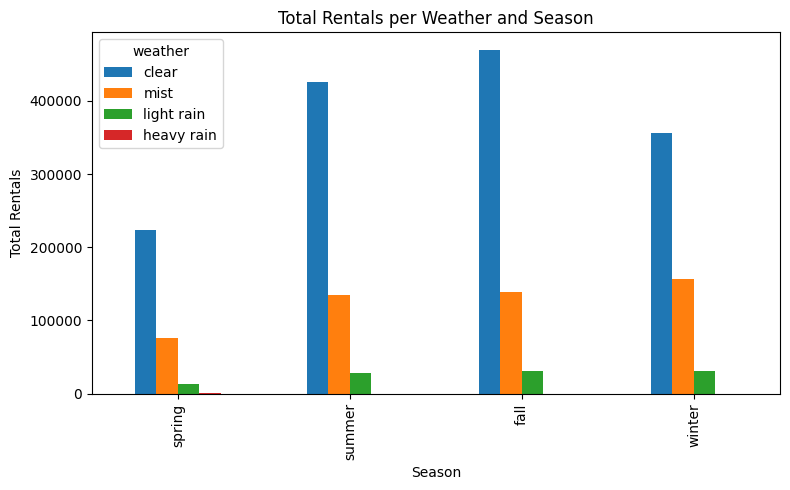

In [28]:
season_names = {1: 'spring', 2: 'summer', 3: 'fall',   4: 'winter'}
weather_names = {1: 'clear', 2: 'mist',   3: 'light rain', 4: 'heavy rain'}

group_ws = df.groupby(['season', 'weather'])['count'].sum().unstack()
group_ws_named = group_ws.rename(index=season_names, columns=weather_names)

plt.figure()
group_ws_named.plot(kind='bar', figsize=(8,5))
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.title('Total Rentals per Weather and Season')
plt.tight_layout()
plt.show()


In [29]:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour  
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

def label_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['period'] = df['hour'].apply(label_period)

NameError: name 'df_train' is not defined

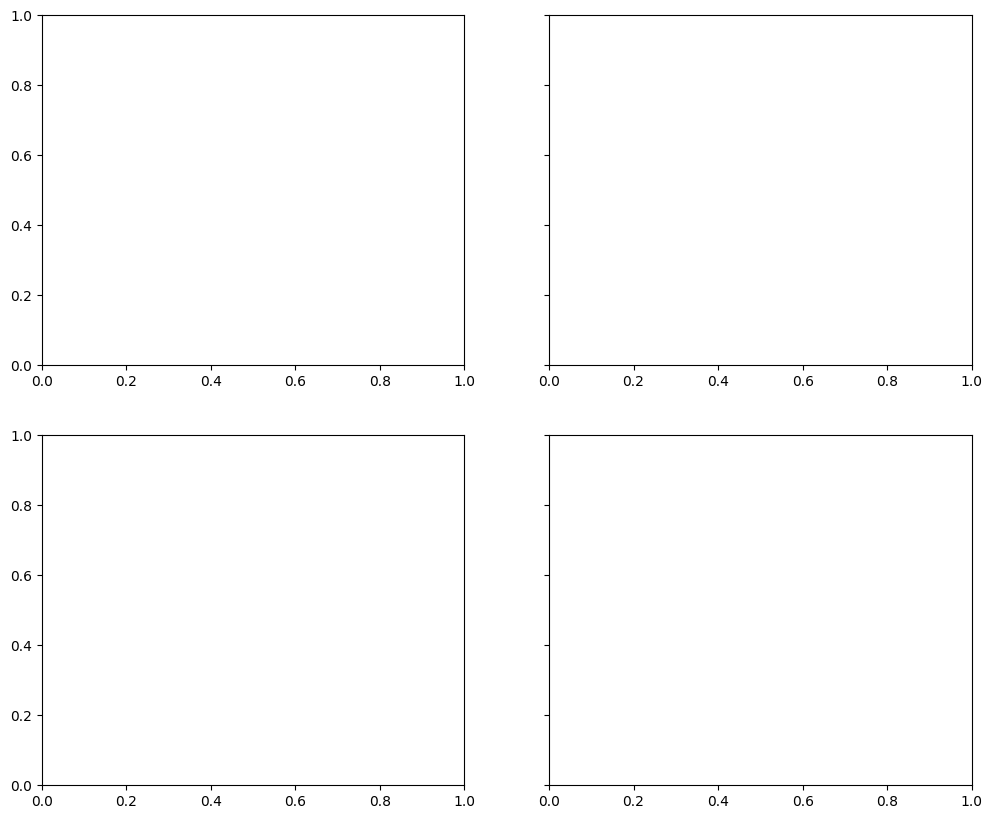

In [30]:
season_names = {1: 'spring', 2: 'summer', 3: 'fall',   4: 'winter'}
weather_names = {1: 'clear', 2: 'mist',   3: 'light rain', 4: 'heavy rain'}
periods = ['Morning', 'Afternoon', 'Evening', 'Night']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10), sharey=True)

for ax, period in zip(axes.flatten(), periods):
    # filter for the period and aggregate
    grp = (df_train[df_train['period'] == period]
           .groupby(['season', 'weather'])['count']
           .sum()
           .unstack()
           .rename(index=season_names, columns=weather_names))
    grp.plot(kind='bar', ax=ax)
    ax.set_title(period)
    ax.set_xlabel('Season')
    ax.set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()


In [ ]:
df

In [ ]:
df = df.drop('datetime', axis=1)
df_ohe = pd.get_dummies(df) # one-hot encoding
df_ohe.head()

In [ ]:
corr = df_ohe[['season','weather','period_Afternoon', 'period_Morning', 'period_Night']].corr()
print(corr)

In [ ]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

import seaborn as sns

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)

In [ ]:
df.groupby(df.period)[['registered','casual']].mean().plot()

In [ ]:
# COMO VARIA LA DEMANDA SEGUN SI ES DIA LABORABLE O NO

mean_by_workday = df.groupby('workingday')['count'].mean() # promedio por dia laborable/no laborable
mean_by_workday.index = mean_by_workday.index.map({0: 'No laborable', 1: 'Laborable'}) # etiquetas

# grafica de barras
mean_by_workday.plot(kind='bar')
plt.xlabel('Tipo de día')
plt.ylabel('Demanda promedio')
plt.title('Demanda media: laborales vs no laborales')
plt.show()

print(mean_by_workday)

In [ ]:
import seaborn as sns

sns.scatterplot(x=df['temp'], y=df['count'], alpha=0.3)
sns.regplot(x=df['temp'], y=df['count'], lowess=True, scatter=False, color='r')


# Predictions

Que predecir?

Regresión de demanda total

Qué predecir: la variable count (número total de alquileres por hora).

Modelos típicos: regresión lineal, Random Forest Regressor, XGBoost.

Métricas: MAE (error medio absoluto), RMSE (raíz del error cuadrático medio), R².

__

Forecasting temporal (series de tiempo)

Qué predecir: el count de la siguiente hora (o del siguiente día) usando rezagos (lags) de count y variables climáticas como features.

Modelos típicos: SARIMAX, Prophet, LSTM, o incluso un XGBoost con lags y medias móviles como entradas.

Métricas: MAE, MAPE (error porcentual medio).

--

Clasificación de tipo de usuario

Qué predecir: dado un registro de hora y clima, si el usuario será “casual” vs. “registered”.

Modelos típicos: árboles, SVM, redes neuronales.

Métricas: Accuracy, Precision/Recall por clase.

--

Detección de anomalías (pseudosurpervisado)

Qué predecir: identificar horas con demanda atípicamente alta o baja (outliers).

Modelos típicos: Isolation Forest, One-Class SVM.

Métricas: no estándar, se evalúa inspeccionando ejemplos anotados.

## Predecir alquileres por hora

### Linear regression

In [ ]:
df_ohe.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# df_test no tiene las columnas count, casual ni registered
X = df_ohe.loc[:, 
    (df_train_ohe.columns != "count") 
  & (df_train_ohe.columns != "casual") 
  & (df_train_ohe.columns != "registered")
]

y = df_train_ohe["count"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para validar
    random_state=42,
    shuffle=True
)

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np

# y_test y y_pred son arrays continuos
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSE: Root Mean Squared Error\n {rmse:.2f}")
print(f"MAE: Mean Absolute Error {mae:.2f}")
print(f"R²: Coeficiente de determinacion {r2:.3f}")

# asegúrate de que no haya predicciones negativas
y_pred_clipped = np.clip(y_pred, a_min=0, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_clipped))
print(f"RMSLE: Root Mean Squared Log Error {rmsle:.4f}")

RMSE: 127.19

El promedio de predicciones se desvia 127 bicicletas por hora del valor real.

MAE:  92.33

En promedio la prediccion se equivoca en 92 bicicletas

R²:   0.510

El modelo captura aprox 51% de la variacion en "count". Lo ideal seria cercano a 1.

RMSLE: 1.0960